# COVID-19 History in Georgia Visualization

*Data from http://covidtracking.com*

In [57]:
import pandas as pd
import numpy as np
import io
import requests
import scipy

url = "https://covidtracking.com/data/download/georgia-history.csv"

s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

After reading the data in, let's do some basic cleansing of the data.

In [36]:
# Sort the data by date
df = data.sort_values(by=['date'], ascending=True)

# Drop columns which don't interest us.
df.drop(columns=["state","dataQualityGrade"], inplace=True)

# Ensure that the date is unique
df["date"].is_unique

True

Now we'll set the index of the data frame to the date.

In [37]:
df

,date,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
259,2020-03-04,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
258,2020-03-05,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
257,2020-03-06,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
256,2020-03-07,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
255,2020-03-08,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-11-14,8956.0,8462.0,51,494.0,33216.0,33216.0,2050.0,127,6220.0,...,3865939,27389,344853.0,NaN,NaN,NaN,NaN,0,3865939,27389
3,2020-11-15,8957.0,8462.0,1,495.0,33241.0,33241.0,1978.0,25,6225.0,...,3887286,21347,345943.0,NaN,NaN,NaN,NaN,0,3887286,21347
2,2020-11-16,8967.0,8471.0,10,496.0,33265.0,33265.0,2070.0,24,6229.0,...,3900708,13422,346476.0,NaN,NaN,NaN,NaN,0,3900708,13422
1,2020-11-17,9008.0,8496.0,41,512.0,33439.0,33439.0,2102.0,174,6259.0,...,3954422,53714,347926.0,NaN,NaN,NaN,NaN,0,3954422,53714


<AxesSubplot:xlabel='date'>

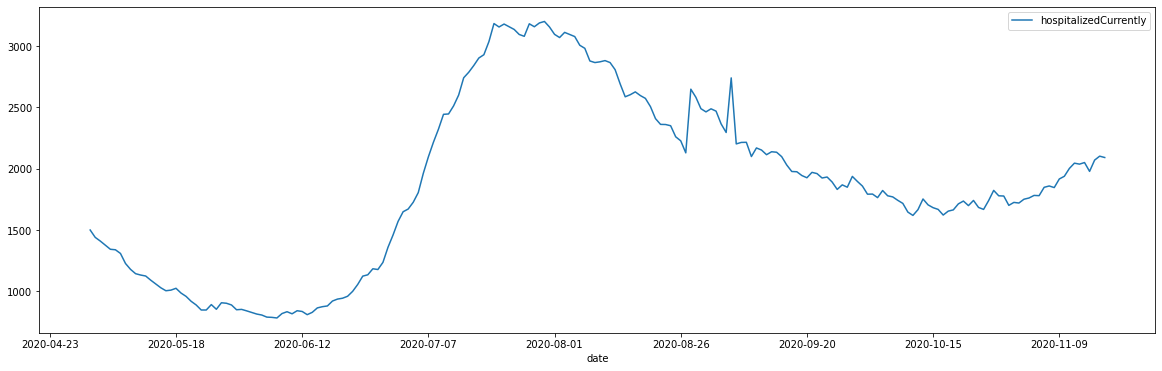

In [38]:
df.plot(x='date', y='hospitalizedCurrently', figsize=(20,6))

The above data is taken from [https://covidtracking.com/data/state/georgia](https://covidtracking.com/data/state/georgia)

<AxesSubplot:xlabel='date'>

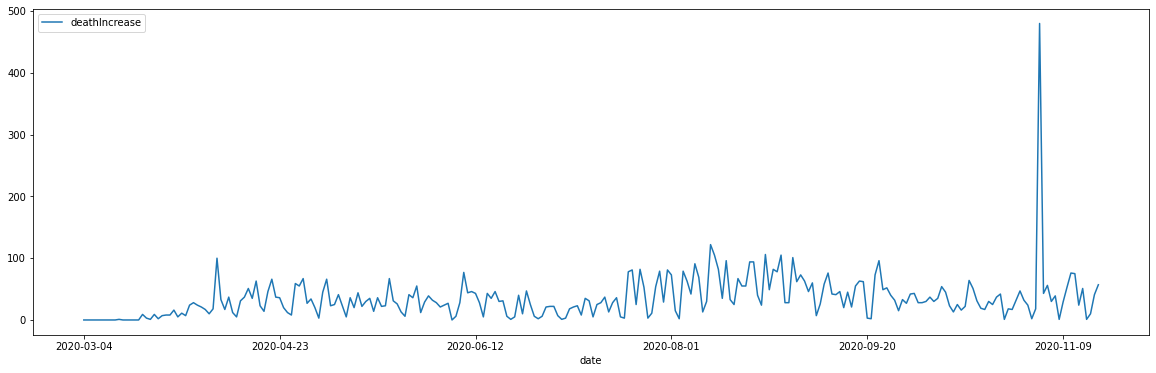

In [39]:
deaths = df.loc[:,('date', 'deathIncrease')]

deaths.sort_values(by=['date'], ascending=True, inplace=True)

deaths.plot(x='date', y='deathIncrease', figsize=(20,6))

OK - There's clearly an outlier there. Let's filter out values by quintile:

In [40]:
q = deaths["deathIncrease"].quantile(.999)
q

387.27800000001514

<AxesSubplot:xlabel='date'>

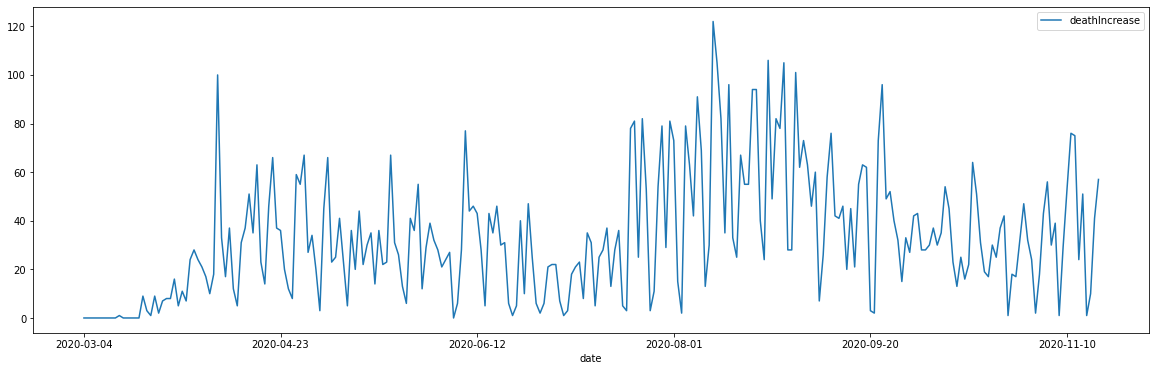

In [41]:
deaths_filtered = deaths[deaths["deathIncrease"] < q]
deaths_filtered.plot(x='date', y='deathIncrease', figsize=(20,6))

<AxesSubplot:>

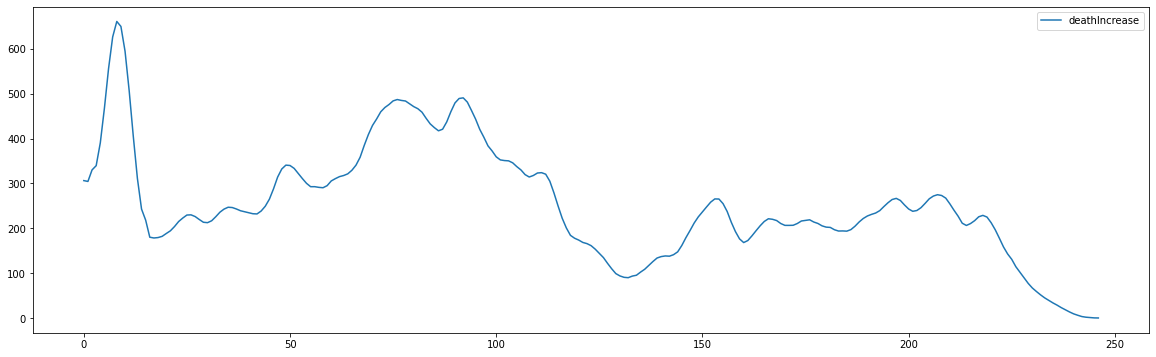

In [63]:
deaths.rolling(14,win_type='hamming').sum().plot(figsize=(20,6))